# Data Analysis - Fashion Transparency Index 2025 
### Data from: Wikirate.org, 'Fashion Transparency Index 2025' by Fashion Revolution, licensed under CC BY 4.0


## Libraries and Imports: 

In [1]:
import pandas as pd

## Data Collection and Loading: 

In [2]:
# The first 4 lines are comments on the dataset, so skiprows accesses the actual data that start after these comments
df = pd.read_csv("../Wikirate-2025_10_21_153411-Fashion_Transparency_Index_2025+Answer.csv", skiprows=4)

## Raw Exploratory Data Analysis (EDA):

In [3]:
print(df.shape)

(200, 6)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Answer Page  200 non-null    object 
 1   Metric       200 non-null    object 
 2   Company      200 non-null    object 
 3   Year         200 non-null    int64  
 4   Value        200 non-null    float64
 5   Source Page  0 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.5+ KB


In [5]:
df.head()

,Answer Page,Metric,Company,Year,Value,Source Page
0,https://wikirate.org/Fashion_Revolution+Fashio...,Fashion Revolution+Fashion Transparency Index ...,Primark,2025,1.499927,NaN
1,https://wikirate.org/Fashion_Revolution+Fashio...,Fashion Revolution+Fashion Transparency Index ...,Gap inc.,2025,2.300026,NaN
2,https://wikirate.org/Fashion_Revolution+Fashio...,Fashion Revolution+Fashion Transparency Index ...,Levi Strauss & Co.,2025,2.633291,NaN
3,https://wikirate.org/Fashion_Revolution+Fashio...,Fashion Revolution+Fashion Transparency Index ...,H&M,2025,7.116664,NaN
4,https://wikirate.org/Fashion_Revolution+Fashio...,Fashion Revolution+Fashion Transparency Index ...,Nike Inc.,2025,2.733265,NaN


## Data Preprocessing

In [6]:
df = df.drop(columns=['Answer Page', 'Metric', 'Year', 'Source Page'])
df = df.rename(columns={"Value": "Transparency_Score"})
df.head()

,Company,Transparency_Score
0,Primark,1.499927
1,Gap inc.,2.300026
2,Levi Strauss & Co.,2.633291
3,H&M,7.116664
4,Nike Inc.,2.733265


In [7]:
df.describe()

,Transparency_Score
count,200.000000
mean,1.399742
std,1.371766
min,0.000000
25%,0.349954
50%,1.116560
75%,2.066514
max,7.116664


In [8]:
df.sort_values("Transparency_Score", ascending=False).head(10)

,Company,Transparency_Score
3,H&M,7.116664
134,Calzedonia,6.250535
144,Intimissimi S.p.A,6.250535
157,Tezenis,6.250535
17,Puma,5.066524
155,OVS SpA,4.933321
16,Gucci,4.666782
43,Gildan Activewear Inc.,4.633400
66,lululemon athletica,3.933430
46,Asics Corporation,3.766937


In [9]:
df.sort_values("Transparency_Score", ascending=True).head(10)

,Company,Transparency_Score
99,LC Waikiki,0.0
53,Urban Outfitters,0.0
124,Eddie Bauer,0.0
123,Bosideng International Holdings Limited,0.0
111,Semir,0.0
110,LL Bean,0.0
108,Ted Baker,0.0
29,Belle International Holdings,0.0
107,Hudson's Bay Company,0.0
106,Forever 21,0.0


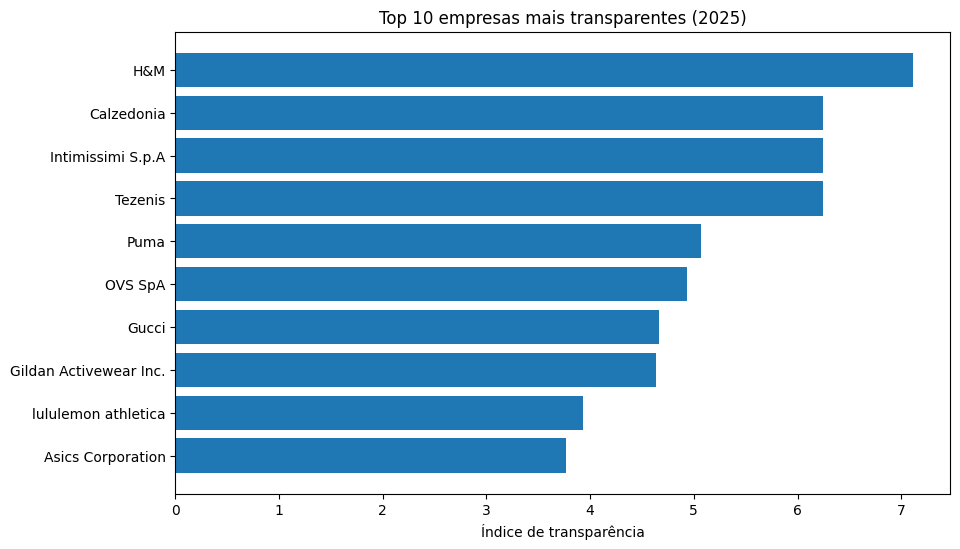

In [10]:
import matplotlib.pyplot as plt

top10 = df.sort_values("Transparency_Score", ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top10["Company"], top10["Transparency_Score"])
plt.gca().invert_yaxis()
plt.title("Top 10 empresas mais transparentes (2025)")
plt.xlabel("Índice de transparência")
plt.show()

## Feature Engineering: 

In [11]:
# Here I'm creating categories to compare how different types of products (luxury, fast fashion, etc) relate to the 
# transparency values in the dataset.
def categorize(company):
    company_name = str(company).lower().strip()
    
    fast_fashion = ["h&m", "zara", "primark", "c&a", "forever 21", "shein", "asos", "mango", "bershka", "pull & bear", "stradivarius", "prettylittlething", "matalan", "river island", "boohoo.com", "massimo dutti", "vero moda", "jack & jones", "urban outfitters", "anthropologie", "free people", "semir", "lc waikiki", "gap inc", ]
    luxury = ["louis vuitton", "gucci", "valentino", "burberry", "hermes", "christian dior", "prada", "miu miu", "moncler", "giorgio armani", "fendi", "chanel", "salvatore ferragamo", "diesel", "celine", "dolce & gabbana", "versace", "saint laurent", "bottega veneta", "balenciaga", "chloe", "capri holdings", "bosideng international holdings limited"]
    sports_wear = ["nike", "adidas", "puma", "converse", "timberland", "the north face", "new balance", "under armour", "asics", "columbia sportswear", "lululemon", "brooks sports", "mizuno", "fila", "reebok", "jordan", "champion", "vans", "decathlon", "jd sports", "skechers", "famous footwear", "belle international holdings"]
    
    if any(x in company_name for x in sports_wear):
        return "Sportswear"
    elif any(x in company_name for x in luxury):
        return "Luxury"
    elif any(x in company_name for x in fast_fashion):
        return "Fast Fashion"
    else:
        return "Mid-Market/Others"

df["Market_Segment"] = df["Company"].apply(categorize) 

## Exploratory Data Analysis (EDA)

In [12]:
print(df['Market_Segment'].value_counts())

df_segment_scores = df.groupby('Market_Segment')['Transparency_Score'].mean().sort_values(ascending=False).reset_index()

print("\nMédia de Score de Transparência por Segmento de Mercado:")
print(df_segment_scores)

Market_Segment
Mid-Market/Others    130
Fast Fashion          24
Sportswear            23
Luxury                23
Name: count, dtype: int64

Média de Score de Transparência por Segmento de Mercado:
      Market_Segment  Transparency_Score
0         Sportswear            1.984824
1       Fast Fashion            1.910371
2             Luxury            1.731784
3  Mid-Market/Others            1.143212


In [13]:
df_segment_scores = df.groupby('Market_Segment')['Transparency_Score'].mean().sort_values(ascending=False).reset_index()

df_segment_scores['Transparency_Score'] = df_segment_scores['Transparency_Score'].round(2)

print(df_segment_scores)

      Market_Segment  Transparency_Score
0         Sportswear                1.98
1       Fast Fashion                1.91
2             Luxury                1.73
3  Mid-Market/Others                1.14


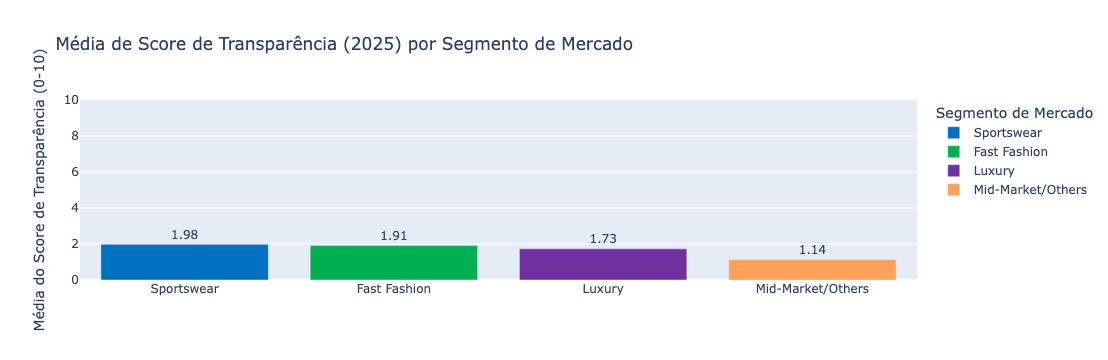

In [14]:
import plotly.express as px

# Color pallete
color_map = {
    'Fast Fashion': '#00B050',  # Verde
    'Sportswear': '#0070C0',    # Azul
    'Luxury': '#7030A0',        # Roxo
    'Mid-Market/Others': '#A0A0A0' # Cinza (Baseline/Others)
}

fig = px.bar(
    df_segment_scores, 
    x='Market_Segment',
    y='Transparency_Score',
    color='Market_Segment', 
    color_discrete_map=color_map,
    
    # Graphic's labels
    title='Média de Score de Transparência (2025) por Segmento de Mercado',
    labels={'Transparency_Score': 'Média do Score de Transparência (0-10)', 'Market_Segment': 'Segmento de Mercado'},
    
    # Hover bar
    hover_data={'Transparency_Score': ':.2f'},
    
    range_y=[0, 10] 
)

# Adding values on top of each bar
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# Improve Layout
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', xaxis_title=None)

fig.show()

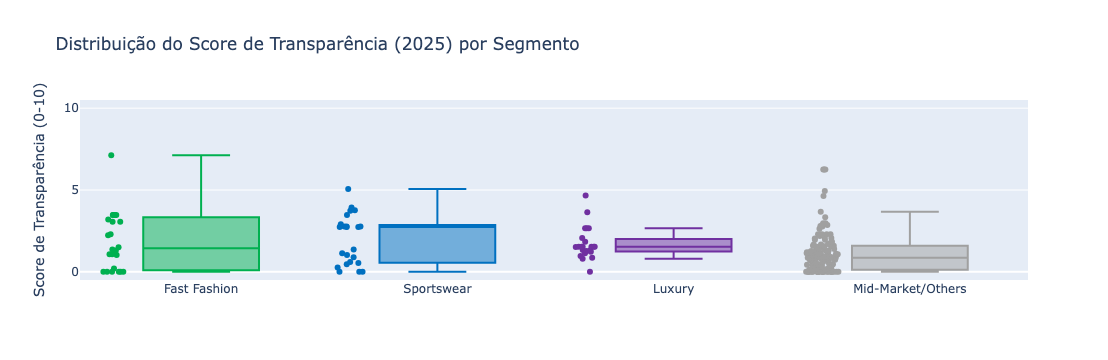

In [17]:
import plotly.express as px
import pandas as pd

segment_order = ['Fast Fashion', 'Sportswear', 'Luxury', 'Mid-Market/Others']

color_map = {
    'Fast Fashion': '#00B050',
    'Sportswear': '#0070C0',
    'Luxury': '#7030A0',
    'Mid-Market/Others': '#A0A0A0'
}

fig = px.box(
    df,
    x='Market_Segment',
    y='Transparency_Score',
    color='Market_Segment',
    category_orders={'Market_Segment': segment_order},
    color_discrete_map=color_map,
    
    title='Distribuição do Score de Transparência (2025) por Segmento',
    labels={'Transparency_Score': 'Score de Transparência (0-10)', 'Market_Segment': 'Segmento de Mercado'},
    
    range_y=[-0.5, 10.5],
    
    points="all" 
)

fig.update_layout(
    xaxis_title=None,
    showlegend=False
)

fig.show()

In [16]:
df_bottom_20 = df.sort_values(by='Transparency_Score', ascending=True)

df_bottom_20 = df_bottom_20.head(20).reset_index(drop=True)

df_bottom_20 = df_bottom_20[['Company', 'Market_Segment', 'Transparency_Score']]

df_bottom_20['Bottom_Rank'] = df_bottom_20.index + 1

print("--- Less Transparent Companies (2025) ---")
print(df_bottom_20)

--- Less Transparent Companies (2025) ---
                                    Company     Market_Segment  \
0                                LC Waikiki       Fast Fashion   
1                          Urban Outfitters       Fast Fashion   
2                               Eddie Bauer  Mid-Market/Others   
3   Bosideng International Holdings Limited             Luxury   
4                                     Semir       Fast Fashion   
5                                   LL Bean  Mid-Market/Others   
6                                 Ted Baker  Mid-Market/Others   
7              Belle International Holdings         Sportswear   
8                      Hudson's Bay Company  Mid-Market/Others   
9                                Forever 21       Fast Fashion   
10                               Buckle Inc  Mid-Market/Others   
11                          Chico's FAS Inc  Mid-Market/Others   
12                              Express Inc  Mid-Market/Others   
13                              He